In [134]:
import math
import numpy as np

import matplotlib.pyplot as plt

In [135]:
import pandas as pd
import json

In [136]:
# dataframe = pd.read_json(r"/../../Downloads/transactions.json")

In [137]:
# Reading JSON data from a file, handling potential multiple objects
json_data = []
with open(r"/Users/akankshadas/Downloads/transactions.json") as f:
    for line in f:
        try:
            json_data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Warning: Skipping invalid JSON line: {line.strip()}")

# Converting JSON data to a pandas DataFrame
if json_data:
    df = pd.DataFrame(json_data)
    print(df.head())
else:
    print("No valid JSON data found in the file.")

  accountNumber customerId  creditLimit  availableMoney  transactionDateTime  \
0     737265056  737265056       5000.0          5000.0  2016-08-13T14:27:32   
1     737265056  737265056       5000.0          5000.0  2016-10-11T05:05:54   
2     737265056  737265056       5000.0          5000.0  2016-11-08T09:18:39   
3     737265056  737265056       5000.0          5000.0  2016-12-10T02:14:50   
4     830329091  830329091       5000.0          5000.0  2016-03-24T21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

  posEntryMode  ... echoBuffer currentBalance merchantCity mer

In [139]:
df.shape

(786363, 29)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [145]:
#Finding number of missing values in each column

In [146]:
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [147]:
df['isFraud'] = df['isFraud'].astype(int)

In [148]:
df.tail(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,0
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,0
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,0
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,0
786362,732852505,732852505,50000.0,48666.83,2016-12-30T20:10:29,72.18,Uber,US,US,05,...,,1333.17,,,,False,,,False,0


In [149]:
df['isFraud'].value_counts()

0    773946
1     12417
Name: isFraud, dtype: int64

In [150]:
import seaborn as snb

In [151]:
#Calculating the percentage of legit vs fraudulent transactions

In [152]:
df['isFraud'].value_counts(normalize=True)*100

0    98.420958
1     1.579042
Name: isFraud, dtype: float64

In [153]:
# Dataset is imbalanced after looking at the percentage of legit vs fraudulent transactions

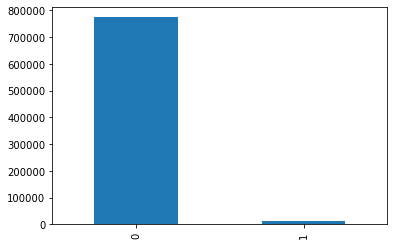

<Figure size 1800x1080 with 0 Axes>

In [154]:
df['isFraud'].value_counts().plot(kind='bar') 
plt.figure(figsize=(25,15))
plt.show() 

In [155]:
# Selecting only relevant features
labels_to_drop = ['transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 
          'merchantCategoryCode', 'currentExpDate', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType', 'echoBuffer', 'merchantCity',
          'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch','accountOpenDate', 'dateOfLastAddressChange']

df = df.drop(labels=labels_to_drop, axis=1)

In [156]:
legit_transactions = df[df.isFraud == 0]
fraudulent_transactions = df[df.isFraud == 1]

In [157]:
legit_transactions.shape

(773946, 7)

In [158]:
fraudulent_transactions.shape

(12417, 7)

In [159]:
legit_transactions.transactionAmount.describe()

count    773946.000000
mean        135.570249
std         146.525305
min           0.000000
25%          33.190000
50%          86.760000
75%         189.390000
max        2011.540000
Name: transactionAmount, dtype: float64

In [160]:
fraudulent_transactions.transactionAmount.describe()

count    12417.000000
mean       225.215905
std        189.551393
min          0.000000
25%         86.000000
50%        176.980000
75%        311.460000
max       1608.350000
Name: transactionAmount, dtype: float64

In [161]:
#legit vs fraudulent
df.groupby('isFraud').mean()

,creditLimit,availableMoney,transactionAmount,currentBalance
isFraud,,,,
0,10754.884062,6252.455386,135.570249,4502.428675
1,11044.958525,6142.894186,225.215905,4902.064338


In [162]:
# Creating a sample data set with a similar distribution of legit and fraudulent transactions

In [163]:
# Undersampling - Grabbing a random sample of 12417 data points from the legit transaction set 
# and joining it with the fraudulent set --> Random Sampling Technique

In [164]:
sample_legit_transactions = legit_transactions.sample(n=12417)

In [165]:
# concatenating this sample set with the original fraudulent data set

In [166]:
undersampled_dataset = pd.concat([sample_legit_transactions,fraudulent_transactions], axis = 0)

In [167]:
undersampled_dataset.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,currentBalance,isFraud
378768,449619624,449619624,15000.0,6767.62,164.97,8232.38,0
168124,225678947,225678947,2500.0,478.16,540.79,2021.84,0
403151,105730883,105730883,500.0,142.44,40.69,357.56,0
765964,807483502,807483502,20000.0,15208.64,166.31,4791.36,0
758936,640481917,640481917,250.0,-93.70,54.45,343.70,0


In [168]:
rows,cols = undersampled_dataset.shape
print(rows)

24834


In [169]:
undersampled_dataset['isFraud'].value_counts()

0    12417
1    12417
Name: isFraud, dtype: int64

In [170]:
# Mean of the dataset is similar to the original dataset

In [171]:
undersampled_dataset.groupby('isFraud').mean()

,creditLimit,availableMoney,transactionAmount,currentBalance
isFraud,,,,
0,10657.908513,6228.728250,135.354799,4429.180263
1,11044.958525,6142.894186,225.215905,4902.064338


In [172]:
# Splitting the dataset into X and Y

In [173]:
X = undersampled_dataset.drop(columns = 'isFraud', axis = 1)
Y = undersampled_dataset['isFraud']

In [174]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24834 entries, 378768 to 786112
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accountNumber      24834 non-null  object 
 1   customerId         24834 non-null  object 
 2   creditLimit        24834 non-null  float64
 3   availableMoney     24834 non-null  float64
 4   transactionAmount  24834 non-null  float64
 5   currentBalance     24834 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.3+ MB


In [175]:
# Splitting the dataset into training and test

In [176]:
trainingSetSampleSize = math.floor(0.8*rows)
print('No of Samples in Training Set:',trainingSetSampleSize)

No of Samples in Training Set: 19867


In [177]:
X_Train = X.iloc[:trainingSetSampleSize,:]
Y_Train_Label = Y.iloc[:trainingSetSampleSize]
print("The shape of the Training Fetaures dataset is :", X_Train.shape)
print("The shape of the Training Label dataset is :", Y_Train_Label.shape)

The shape of the Training Fetaures dataset is : (19867, 6)
The shape of the Training Label dataset is : (19867,)


In [178]:
X_Test = X.iloc[trainingSetSampleSize:,:]
Y_Test_Label = Y.iloc[trainingSetSampleSize:]
print("The shape of the Test Fetaures dataset is :", X_Test.shape)
print("The shape of the Test Label dataset is :", Y_Test_Label.shape)

The shape of the Test Fetaures dataset is : (4967, 6)
The shape of the Test Label dataset is : (4967,)


In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
model = LogisticRegression()

In [181]:
model.fit(X_Train, Y_Train_Label)

LogisticRegression()

In [182]:
from sklearn.metrics import accuracy_score

In [184]:
X_Train_prediction = model.predict(X_Train)
training_set_accuracy = accuracy_score(X_Train_prediction,Y_Train_Label) 

In [185]:
print("The accuracy of training set is", training_set_accuracy)

The accuracy of training set is 0.625006291840741


In [187]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
model1 = RandomForestClassifier(n_estimators = 80)

In [195]:
model1.fit(X_Train, Y_Train_Label)

RandomForestClassifier(n_estimators=80)

In [196]:
model1.score(X_Test, Y_Test_Label)

0.15240587880008052

In [197]:
# Undersampling was clearly not the right way to handle the imbalanced data set

In [198]:
# Oversampling using SMOTE

In [199]:
df.shape

(786363, 7)

In [203]:
pip install -U imbalanced-learn

     |████████████████████████████████| 258 kB 5.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [204]:
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
import joblib
from sklearn.metrics import (precision_score, recall_score, roc_auc_score, accuracy_score,
                               confusion_matrix, precision_recall_curve, roc_curve, brier_score_loss)

In [205]:
X_attribute = df.drop(['isFraud'], axis = 1)
Y_attribute = df[['isFraud']]

In [207]:
sm = SMOTE(random_state=4)
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_attribute, Y_attribute)
print("Y label count before sampling",Y_attribute.isFraud.value_counts())
print("Y label count after sampling", y_smote.isFraud.value_counts())

Y label count before sampling 0    773946
1     12417
Name: isFraud, dtype: int64
Y label count after sampling 0    773946
1    773946
Name: isFraud, dtype: int64


In [212]:
X_smote.shape

(1547892, 6)

In [213]:
y_smote.shape

(1547892, 1)

In [214]:
trainingSetSampleSize1 = math.floor(0.8*1547892)
print('No of Samples in Training Set:',trainingSetSampleSize1)

No of Samples in Training Set: 1238313


In [222]:
X_Train1 = X_smote.iloc[:trainingSetSampleSize1,:]
Y_Train_Label1 = y_smote.iloc[:trainingSetSampleSize1]
print("The shape of the Training Fetaures dataset is :", X_Train1.shape)
print("The shape of the Training Label dataset is :", Y_Train_Label1.shape)

The shape of the Training Fetaures dataset is : (1238313, 6)
The shape of the Training Label dataset is : (1238313, 1)


In [223]:
X_Test1 = X_smote.iloc[trainingSetSampleSize1:,:]
Y_Test_Label1 = y_smote.iloc[trainingSetSampleSize1:]
print("The shape of the Test Fetaures dataset is :", X_Test1.shape)
print("The shape of the Test Label dataset is :", Y_Test_Label1.shape)

The shape of the Test Fetaures dataset is : (309579, 6)
The shape of the Test Label dataset is : (309579, 1)


In [224]:
model_oversampled = LogisticRegression()

In [225]:
model_oversampled.fit(X_Train1, Y_Train_Label1)

/Users/akankshadas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [226]:
X_Train_prediction1 = model_oversampled.predict(X_Train1)
training_set_accuracy1 = accuracy_score(X_Train_prediction1,Y_Train_Label1) 

In [227]:
print("The accuracy of training set is", training_set_accuracy1)

The accuracy of training set is 0.625000302831352
